In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from dataset import TrainData, TrainDataset

In [2]:
r = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_red.png", cv2.IMREAD_GRAYSCALE)
g = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_green.png", cv2.IMREAD_GRAYSCALE)
b = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_blue.png", cv2.IMREAD_GRAYSCALE)
y = cv2.imread("../../hpa/train/0a00aab2-bbbb-11e8-b2ba-ac1f6b6435d0_yellow.png", cv2.IMREAD_GRAYSCALE)

In [3]:
rgb = np.stack([r, g, b], axis=2)

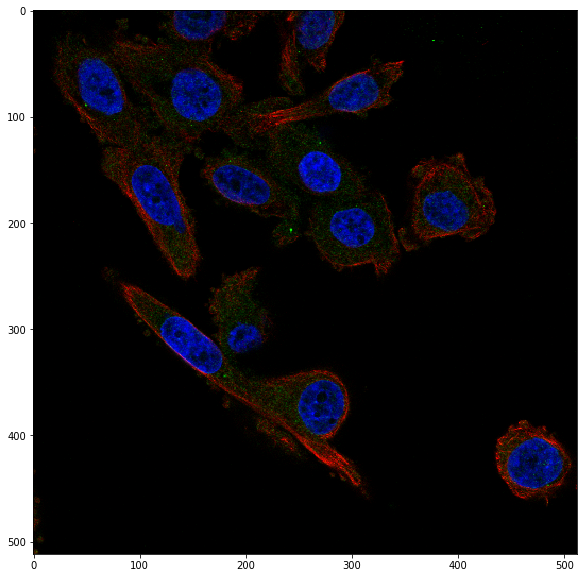

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb)

In [5]:
train_data = TrainData("../../hpa")

Time to prepare train data: 0:00:00.139633


In [6]:
train_data.df.describe()

,Target
count,31072
unique,577
top,"(0,)"
freq,2414


In [7]:
train_data.df.head()

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"(0, 16)"
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"(0, 1, 2, 7)"
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,"(5,)"
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,"(1,)"
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,"(18,)"


In [8]:
submission_df = pd.read_csv(
    "./submission.csv",
    index_col="Id",
    converters={"Predicted": lambda target: [] if len(str(target)) == 0 else tuple(map(int, str(target).split(" ")))}
)

submission_df.rename(columns={"Predicted": "Target"}, inplace=True)

In [9]:
submission_df.head()

,Target
Id,
00008af0-bad0-11e8-b2b8-ac1f6b6435d0,"(2,)"
0000a892-bacf-11e8-b2b8-ac1f6b6435d0,"(5, 25)"
0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,"(0, 25)"
0008baca-bad7-11e8-b2b9-ac1f6b6435d0,"(0, 25)"
000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,"(25,)"


In [10]:
def count_categories(df):
    category_count = np.zeros(28, dtype=np.int32)
    for t in df.Target:
        for c in t:
            category_count[c] += 1
    return category_count


def plot_category_counts(df):
    category_count = count_categories(df)
    plt.bar(range(len(category_count)), category_count / sum(category_count))
    print(category_count.tolist())
    print(min(category_count))
    print(max(category_count))

[12885, 1254, 3621, 1561, 1858, 2513, 1008, 2822, 53, 45, 28, 1093, 688, 537, 1066, 21, 530, 210, 902, 1482, 172, 3777, 802, 2965, 322, 8228, 328, 11]
11
12885


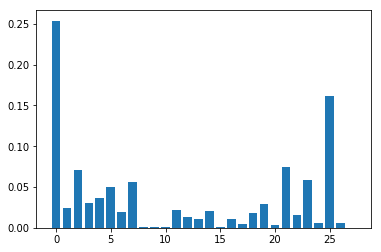

In [11]:
plot_category_counts(train_data.df)

[4536, 371, 873, 325, 391, 545, 345, 669, 2, 3, 3, 381, 293, 127, 469, 2, 226, 147, 326, 422, 29, 1303, 278, 732, 110, 3080, 199, 1]
1
4536


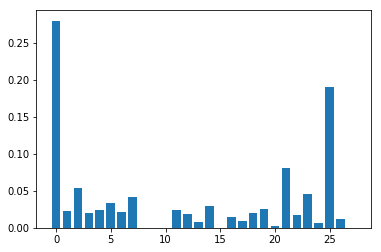

In [12]:
plot_category_counts(submission_df)

[10286, 1005, 2905, 1250, 1477, 2031, 810, 2220, 43, 33, 21, 898, 555, 427, 847, 15, 416, 163, 717, 1197, 139, 3018, 632, 2380, 278, 6626, 269, 9]
9
10286


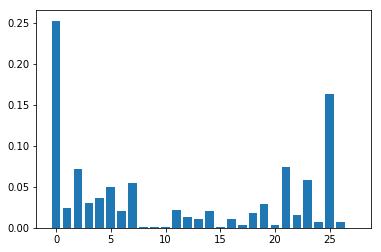

In [13]:
plot_category_counts(train_data.train_set_df)

[2599, 249, 716, 311, 381, 482, 198, 602, 10, 12, 7, 195, 133, 110, 219, 6, 114, 47, 185, 285, 33, 759, 170, 585, 44, 1602, 59, 2]
2
2599


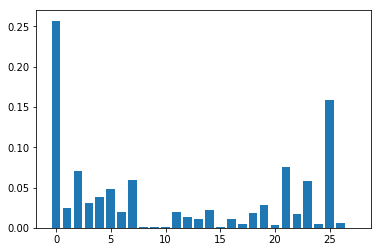

In [14]:
plot_category_counts(train_data.val_set_df)

In [15]:
category_count = count_categories(train_data.df)
category_weights = [np.median(category_count) / cc for cc in category_count]
print(category_weights)
print(min(category_weights))
print(max(category_weights))

[0.07411719053162592, 0.7615629984051037, 0.26373929853631595, 0.6117873158231902, 0.5139935414424112, 0.3800238758456029, 0.9474206349206349, 0.33841247342310415, 18.0188679245283, 21.22222222222222, 34.107142857142854, 0.8737419945105215, 1.3880813953488371, 1.7783985102420856, 0.8958724202626641, 45.476190476190474, 1.8018867924528301, 4.5476190476190474, 1.058758314855876, 0.6443994601889339, 5.5523255813953485, 0.25284617421233785, 1.1907730673316708, 0.3220910623946037, 2.9658385093167703, 0.11606708799222168, 2.9115853658536586, 86.81818181818181]
0.07411719053162592
86.81818181818181


In [16]:
def calculate_category_lenghts(df):
    category_len = {}
    for t in df.Target:
        category_len[len(t)] = category_len.setdefault(len(t), 0) + 1
    print(category_len)
    return category_len

In [17]:
calculate_category_lenghts(train_data.df)
calculate_category_lenghts(train_data.train_set_df)
calculate_category_lenghts(train_data.val_set_df)
calculate_category_lenghts(submission_df)

{2: 12485, 4: 299, 1: 15126, 3: 3160, 5: 2}
{2: 10034, 4: 246, 1: 12060, 3: 2515, 5: 2}
{2: 2451, 1: 3066, 3: 645, 4: 53}
{1: 5777, 2: 3795, 0: 1217, 3: 838, 4: 69, 6: 1, 5: 5}


{1: 5777, 2: 3795, 0: 1217, 3: 838, 4: 69, 6: 1, 5: 5}

In [18]:
train_dataset = TrainDataset(
    train_data.train_set_df,
    "../../hpa",
    num_categories=28,
    image_size=512,
    augment=True,
    normalize_images=False)

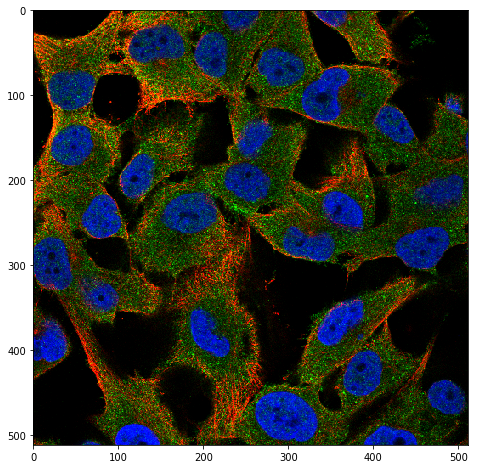

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(train_dataset[20][0].data.numpy().transpose(1, 2, 0)[:, :, :3], vmin=0.0, vmax=1.0)